# Eight Queens Genetic Algorithim

In [5]:
import random

from scipy import special

def generate_board_state(number_of_queens):
    return [random.randrange(number_of_queens) for num in range(number_of_queens )]

def generate_population(number_of_queens=8, size_of_population=19):
        return [generate_board_state(number_of_queens) for _ in range(size_of_population)]

def check_for_completed_board(boards, number_of_queens, perfect_score):
    for board in boards:
        if generate_fitness_score(board, number_of_queens) == perfect_score:
            return board

    return []


In [6]:
def generate_fitness_score(board_state, number_of_queens):
    """determine number of queens not being attacked
        :input board_state array of queens
    """
    fitness_score = 0

    for determining_row_index in range(number_of_queens):
        determining_value = board_state[determining_row_index]
        for row_index in range(number_of_queens):
            # can't attack itself
            if determining_row_index == row_index:
                continue
            if board_state[row_index] == determining_value:
                continue
            if row_index + board_state[row_index] == determining_row_index + determining_value:
                continue
            if row_index - board_state[row_index] == determining_row_index - determining_value:
                continue

            fitness_score += 1

    return fitness_score / 2


## test genereate fitness score
generate_fitness_score([7,1,4,2,0,6,3,5], number_of_queens=8) == 28

True

In [7]:
def _random_weighted_choice(population, weights, selected=None):
    """pick one from list proportional to weights"""

    if selected is not None:
        index = population.index(selected)
        population = population[:index] + population[index+1:]
        weights = weights[:index] + weights[index+1:]

    return random.choices(population, weights=weights, k=1)[0]


def selection(boards, fitness_scores, size_of_population):
    """return a list of selected pairs"""
    # create weights

    selected = []
    for _ in range(size_of_population):
        parent_one = _random_weighted_choice(boards, fitness_scores)
        parent_two = _random_weighted_choice(boards, fitness_scores, selected=parent_one)

        selected.append((parent_one, parent_two))

    return selected



test_population = [[1],[2],]
weights = [1,1]

selection(test_population, weights, size_of_population=2)

test_population = [[1],[2],[3],[4]]
weights = [19,20,26,16]

selection(test_population, weights, size_of_population=4)


[([1], [4]), ([3], [1]), ([1], [2]), ([3], [1])]

In [8]:

def _crssover(parent_one, parent_two, cross_over_index):
    return parent_one[:cross_over_index] + parent_two[cross_over_index:]

def crossover(selected_pairs, number_of_queens):

    children = []
    for s_p in selected_pairs:
        # generate random cross over points - 0 - max number of queens
        cross_over_index = random.randint(0, number_of_queens - 1)
        parent_one = s_p[0]
        parent_two = s_p[1]   

        child = _crssover(parent_one, parent_two, cross_over_index)
        children.append(child)

    return children


crossover([([1,1,1,1,1,1,1,1], [0,0,0,0,0,0,0,0])], number_of_queens=8)

[[1, 0, 0, 0, 0, 0, 0, 0]]

In [9]:
def _mutate(board, number_of_queens):
    mutation_point = random.randint(0, number_of_queens - 1)
    # TODO this could possibly be the same value

    current_value = board[mutation_point]
    new_value = current_value

    while new_value == current_value:
        new_value = random.randint(0, number_of_queens - 1)

    board[mutation_point] = new_value

    return board


def mutation(boards, mutation_frequency, number_of_queens):        
    for i,board in enumerate(boards):
        x = random.randint(1, mutation_frequency)
        if x == 1:
            boards[i] = _mutate(board, number_of_queens)
    return boards


_mutate([1,2,3], 3)
mutation([[1,2,3]], 3, 3)

[[1, 2, 3]]

In [33]:
def generation(population, size_of_population, number_of_queens, mutation_frequency):
    # b) fitness function
    # a fitness score is calculated based off the number of non attacking queen pairs
    fit_scores = [generate_fitness_score(board, number_of_queens) for board in population]

    # fitness scores

    # c) select parents
    # two parents are selected at random - in accordance with probability from score in b)
    # a cross over point is chosen at random from positions in the string
    selected_pairs = selection(population, fit_scores, size_of_population)
    
    # d) cross over
    # offspring are created by crossing over parent strings at the crossover point
    # crossover(selected_pairs,number_of_queens)
    children = crossover(selected_pairs, number_of_queens)


    # e) mutation
        # each location is subject to random mutation with a small independent probability
        # this involves choosing a queen at random and moving it to a random square in its column
    mutated = mutation(children, mutation_frequency, number_of_queens)

    return mutated, fit_scores

    # f) TODO is this a thing?????
    # introduce previous top scoring offspring to keep fitness ??? is this part of original algo?? or an optimisation????


In [106]:
import timeit

NUMBER_OF_QUEENS=8
SIZE_OF_POPULATION=19
MUTATION_FREQUENCY = 15
# TODO HOW IS THIS CALCULATED
perfect_score = special.comb(NUMBER_OF_QUEENS, 2)


def genetic_algorithm(population):

    start_time = timeit.default_timer()

    gen = 0
    completed_board = []

    # # g) check if it has found correct state and exit loop
    while not completed_board:
        population, fitness_scores = generation(population, SIZE_OF_POPULATION, NUMBER_OF_QUEENS, MUTATION_FREQUENCY)
        completed_board = check_for_completed_board(population, NUMBER_OF_QUEENS, perfect_score)
        gen += 1

        if gen == 30000:
            break
        # if gen % 1000 == 0:
        #     print(f"run for {gen} generations")

    stop_time = timeit.default_timer()

    print(f"elapsed_time: {stop_time - start_time}")
    print(f"number_of_generations: {gen}")
    print(f"completed_state: {completed_board}")
    print("=========================")

    return {
        "elapsed_time": stop_time - start_time,
        "number_of_generations": gen,
        "completed_state": completed_board
    }

# a) generate initial population
population = generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION)

ga_result = genetic_algorithm(population)

ga_result



elapsed_time: 1.6610951000002387
number_of_generations: 1145
completed_state: [6, 1, 3, 0, 7, 4, 2, 5]


{'elapsed_time': 1.6610951000002387,
 'number_of_generations': 1145,
 'completed_state': [6, 1, 3, 0, 7, 4, 2, 5]}

In [107]:
# import pickle

# NUMBER_OF_QUEENS=8
# SIZE_OF_POPULATION=19
# MUTATION_FREQUENCY = 15
# # TODO HOW IS THIS CALCULATED
# perfect_score = special.comb(NUMBER_OF_QUEENS, 2)


# # generate test populations

# test_population = []

# for i in range(100):
#         test_population.append( generate_population(NUMBER_OF_QUEENS, SIZE_OF_POPULATION))

# with open('test_populations', 'wb') as f:
#         pickle.dump(test_population, f)

In [108]:
import pickle

with open('test_populations', 'rb') as f:
    test_population = pickle.load(f)


In [109]:

# file = open("test_populations",'rb')
# object_file = pickle.load(file)

# results = {
#         "elapsed_time": [],
#         "number_of_generations": [],
#         "completed_state": []
# }

# for pop in test_population:

#         ga_result = genetic_algorithm(population)

#         results["elapsed_time"].append(ga_result["elapsed_time"])
#         results["number_of_generations"].append(ga_result["number_of_generations"])
#         results["completed_state"].append(ga_result["completed_state"])


# results

elapsed_time: 12.42194070000005
number_of_generations: 8318
completed_state: [3, 0, 4, 7, 5, 2, 6, 1]
elapsed_time: 10.76807269999972
number_of_generations: 6671
completed_state: [2, 4, 6, 0, 3, 1, 7, 5]
elapsed_time: 2.6814834999995583
number_of_generations: 1593
completed_state: [4, 1, 3, 5, 7, 2, 0, 6]
elapsed_time: 4.513039999999819
number_of_generations: 2730
completed_state: [3, 0, 4, 7, 1, 6, 2, 5]
elapsed_time: 4.783787499999562
number_of_generations: 3010
completed_state: [2, 0, 6, 4, 7, 1, 3, 5]
elapsed_time: 1.2658094999997047
number_of_generations: 856
completed_state: [2, 4, 6, 0, 3, 1, 7, 5]
elapsed_time: 5.858380100000431
number_of_generations: 4210
completed_state: [3, 7, 0, 4, 6, 1, 5, 2]
elapsed_time: 3.03609570000026
number_of_generations: 1932
completed_state: [6, 0, 2, 7, 5, 3, 1, 4]
elapsed_time: 6.576893599999494
number_of_generations: 4616
completed_state: [5, 3, 1, 7, 4, 6, 0, 2]
elapsed_time: 8.470870199999808
number_of_generations: 5207
completed_state: [6, 0

{'elapsed_time': [12.42194070000005,
  10.76807269999972,
  2.6814834999995583,
  4.513039999999819,
  4.783787499999562,
  1.2658094999997047,
  5.858380100000431,
  3.03609570000026,
  6.576893599999494,
  8.470870199999808,
  5.457331300000078,
  5.016763400000855,
  5.457257000000027,
  2.6923329000001104,
  11.247844499999701,
  6.930555199999617,
  2.9988882000006924,
  9.776654999999664,
  6.7756645999998,
  4.005597600000328,
  7.33007009999983,
  3.9011387999998988,
  0.7714324000007764,
  1.3182255000001533,
  26.504371199999696,
  3.1595500000003085,
  36.96143249999932,
  1.6612622000002375,
  2.017812799999774,
  4.443279199999779,
  53.320954199999505,
  3.8531061999992744,
  53.55574830000023,
  3.170626699999957,
  14.632177399999819,
  6.066328599999906,
  4.302313099999992,
  6.960628599999836,
  27.701045200000408,
  10.255337300000065,
  30.24775959999988,
  2.3017444000006435,
  36.41407650000019,
  8.155892299999323,
  10.480731900000137,
  1.5810812999998234,
  1

In [110]:
import pandas as pd

results_df = pd.DataFrame(results)

mean_number_of_generations = results_df["number_of_generations"].mean()
mean_elapsed_time = results_df["elapsed_time"].mean()

std_number_of_generations = results_df["number_of_generations"].std()
std_elapsed_time = results_df["elapsed_time"].std()


print(results_df)

print(f"mean_number_of_generations: {mean_number_of_generations}")
print(f"std_number_of_generations: {std_number_of_generations}")
print(f"mean_elapsed_time: {mean_elapsed_time}")
print(f"std_elapsed_time: {std_elapsed_time}")

    elapsed_time  number_of_generations           completed_state
0      12.421941                   8318  [3, 0, 4, 7, 5, 2, 6, 1]
1      10.768073                   6671  [2, 4, 6, 0, 3, 1, 7, 5]
2       2.681483                   1593  [4, 1, 3, 5, 7, 2, 0, 6]
3       4.513040                   2730  [3, 0, 4, 7, 1, 6, 2, 5]
4       4.783787                   3010  [2, 0, 6, 4, 7, 1, 3, 5]
..           ...                    ...                       ...
95      6.869762                   3839  [5, 3, 6, 0, 2, 4, 1, 7]
96      8.744122                   5232  [5, 2, 6, 1, 7, 4, 0, 3]
97      2.882624                   1738  [3, 1, 6, 2, 5, 7, 0, 4]
98      2.823728                   1673  [4, 6, 1, 5, 2, 0, 7, 3]
99     13.102215                   7630  [0, 6, 4, 7, 1, 3, 5, 2]

[100 rows x 3 columns]
mean_number_of_generations: 5354.48
std_number_of_generations: 5600.043177106275
mean_elapsed_time: 10.960063944999956
std_elapsed_time: 11.107516642850415


In [169]:
# some didnt finish
results_df[results_df["elapsed_time"] > 50]

,elapsed_time,number_of_generations,completed_state
30,53.320954,30000,[]
32,53.555748,30000,[]


In [171]:

import math

def round_down_to_1000(x):
    return round(x, -3) 


floored_elapsed_time = results_df["elapsed_time"].apply(math.floor)
floored_number_of_generations = results_df["number_of_generations"].apply(round_down_to_1000)

In [172]:
frame = { 'elapsed_time': floored_elapsed_time, 'number_of_generations': floored_number_of_generations }

floored_results_df = pd.DataFrame(frame)

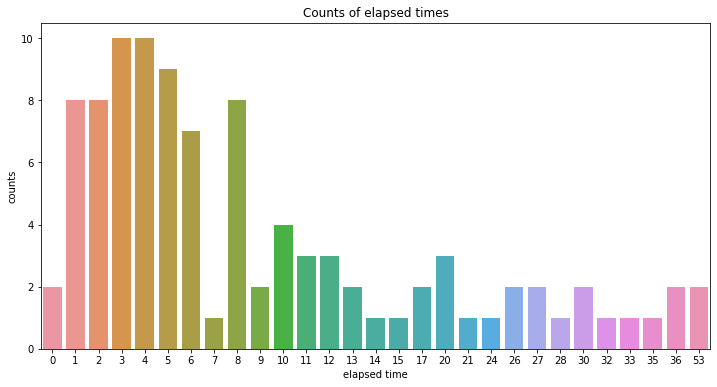

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.elapsed_time.value_counts().index, y=floored_results_df.elapsed_time.value_counts())

plt.xlabel("elapsed time")
plt.ylabel("counts")
plt.title("Counts of elapsed times")
plt.savefig('results/counts_of_elapsed_time.png')
plt.show(fig)

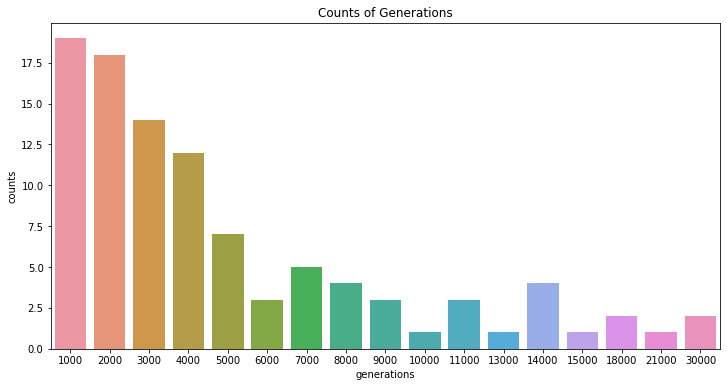

In [174]:

plt.figure(figsize=(12,6))

fig = sns.barplot(x=floored_results_df.number_of_generations.value_counts().index, y=floored_results_df.number_of_generations.value_counts())

plt.xlabel("generations")
plt.ylabel("counts")
plt.title("Counts of Generations")
plt.savefig('results/counts_of_generations.png')
plt.show(fig)